In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv("quotes_with_tags.csv")

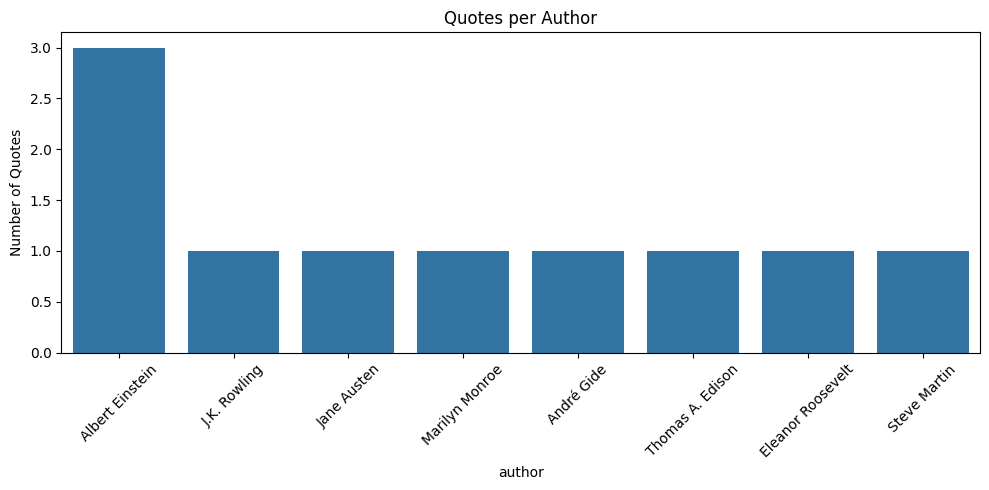

In [5]:
author_counts = df['author'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=author_counts.index, y=author_counts.values)
plt.xticks(rotation=45)
plt.title("Quotes per Author")
plt.ylabel("Number of Quotes")
plt.tight_layout()
plt.show()

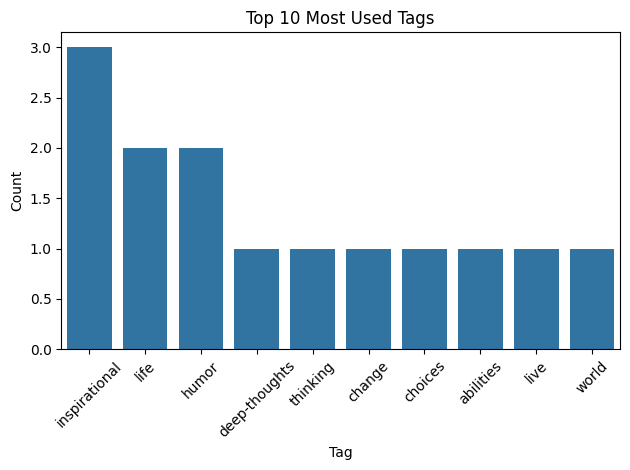

In [6]:
from collections import Counter
all_tags = []
for tag_string in df['tags']:
    all_tags.extend(tag_string.split(';'))
tag_counts = Counter(all_tags)
tag_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count']).sort_values(by='Count', ascending=False).head(10)
sns.barplot(x='Tag', y='Count', data=tag_df)
plt.title("Top 10 Most Used Tags")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
print(df.columns)
print(df.head())

Index(['quote', 'author', 'tags'], dtype='object')
                                               quote           author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   
3  “The person, be it gentleman or lady, who has ...      Jane Austen   
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe   

                                       tags  
0       change;deep-thoughts;thinking;world  
1                         abilities;choices  
2  inspirational;life;live;miracle;miracles  
3             aliteracy;books;classic;humor  
4                 be-yourself;inspirational  


In [9]:
from textblob import TextBlob
df['sentiment_score'] = df['quote'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

In [10]:
print(df.head())
print(df.columns)

                                               quote           author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   
3  “The person, be it gentleman or lady, who has ...      Jane Austen   
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe   

                                       tags  sentiment_score sentiment_label  
0       change;deep-thoughts;thinking;world         0.000000         Neutral  
1                         abilities;choices         0.300000        Positive  
2  inspirational;life;live;miracle;miracles         0.003788        Positive  
3             aliteracy;books;classic;humor        -0.050000        Negative  
4                 be-yourself;inspirational        -0.277778        Negative  
Index(['quote', 'author', 'tags', 'sentiment_score', 'sentiment_label'], dtype='object'

C:\Users\91735\AppData\Local\Temp\ipykernel_11012\2235577566.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='coolwarm')


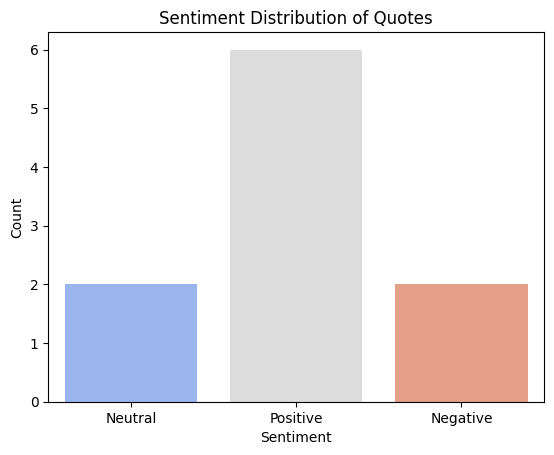

In [11]:
sns.countplot(x='sentiment_label', data=df, palette='coolwarm')
plt.title("Sentiment Distribution of Quotes")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

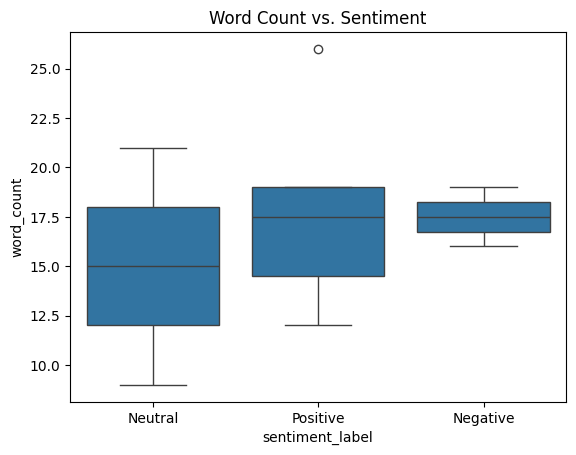

In [12]:
df['word_count'] = df['quote'].apply(lambda x: len(x.split()))
sns.boxplot(x='sentiment_label', y='word_count', data=df)
plt.title("Word Count vs. Sentiment")
plt.show()